In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='latin1')

# Preview the dataset
print(df.head())


       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


In [4]:
# Drop rows with all NaNs
df = df.dropna(how='all')

# Drop redundant columns
df = df.drop(['Country_Code', 'Event_gender'], axis=1)

# Fix data types
df['Year'] = df['Year'].astype(int)

# Drop rows with missing data
df_cleaned = df.dropna()

# Confirm final shape
print(df_cleaned.info())


KeyError: "['Country_Code', 'Event_gender'] not found in axis"

/tmp/ipython-input-6-2863601919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


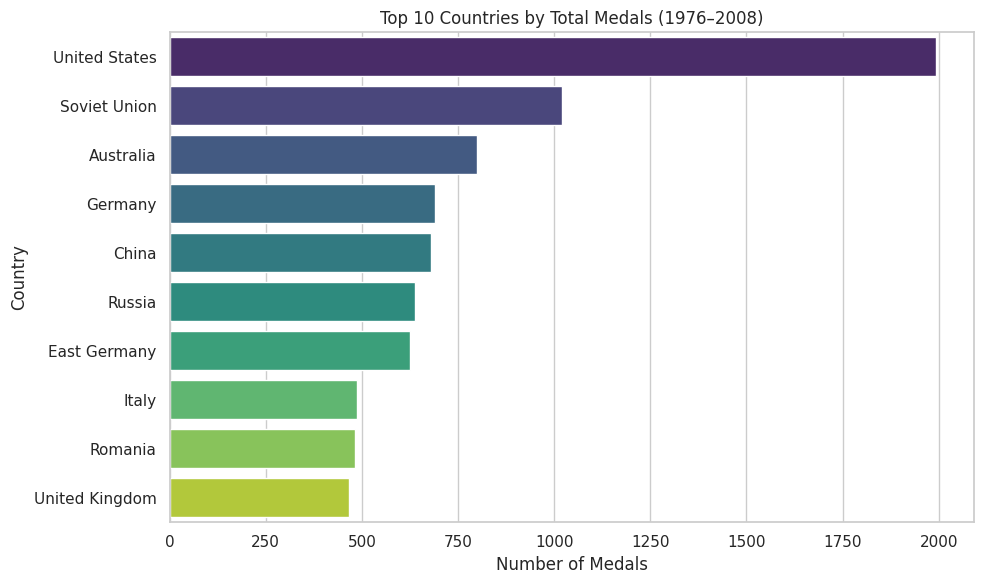

In [6]:
sns.set(style="whitegrid")

top_countries = df_cleaned['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Total Medals (1976–2008)")
plt.xlabel("Number of Medals")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


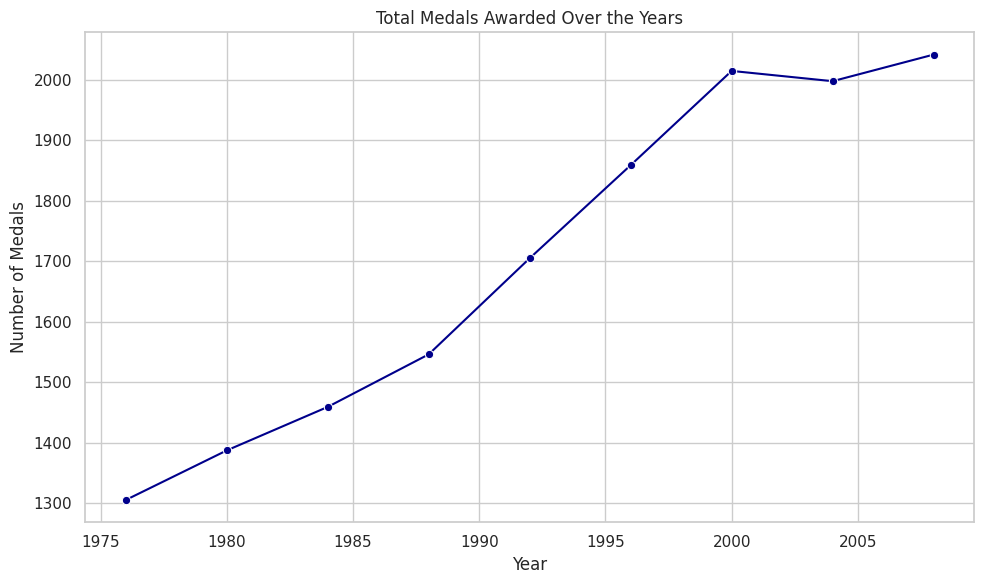

In [8]:
medals_by_year = df_cleaned.groupby('Year')['Medal'].count()

plt.figure(figsize=(10, 6))
sns.lineplot(x=medals_by_year.index, y=medals_by_year.values, marker='o', color='darkblue')
plt.title("Total Medals Awarded Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.grid(True)
plt.tight_layout()
plt.show()


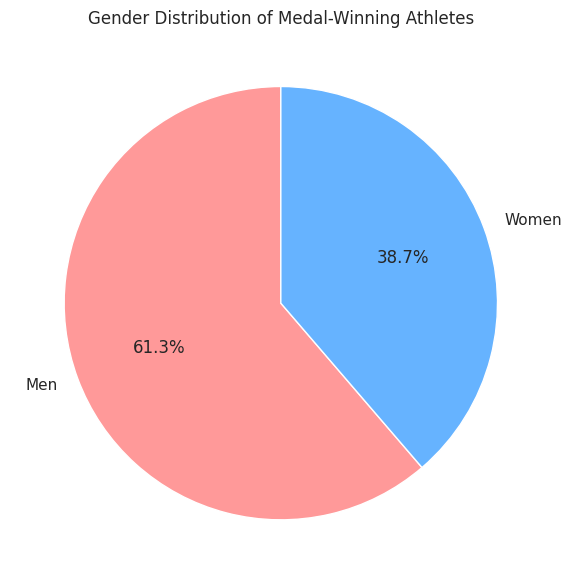

In [10]:
gender_dist = df_cleaned['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Gender Distribution of Medal-Winning Athletes")
plt.tight_layout()
plt.show()


/tmp/ipython-input-12-1850038560.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_athletes.values, y=top_athletes.index, palette="magma")


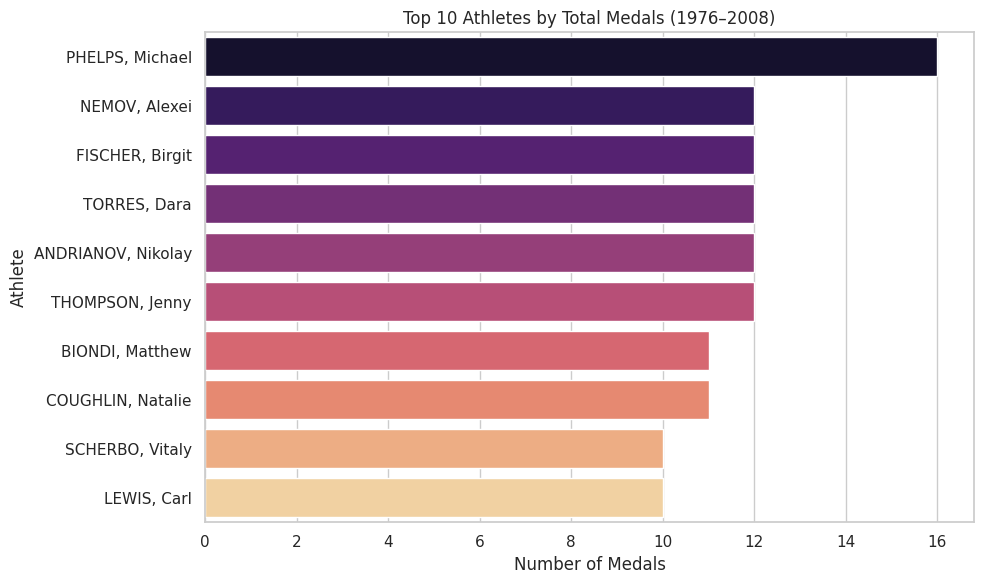

In [12]:
top_athletes = df_cleaned['Athlete'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_athletes.values, y=top_athletes.index, palette="magma")
plt.title("Top 10 Athletes by Total Medals (1976–2008)")
plt.xlabel("Number of Medals")
plt.ylabel("Athlete")
plt.tight_layout()
plt.show()


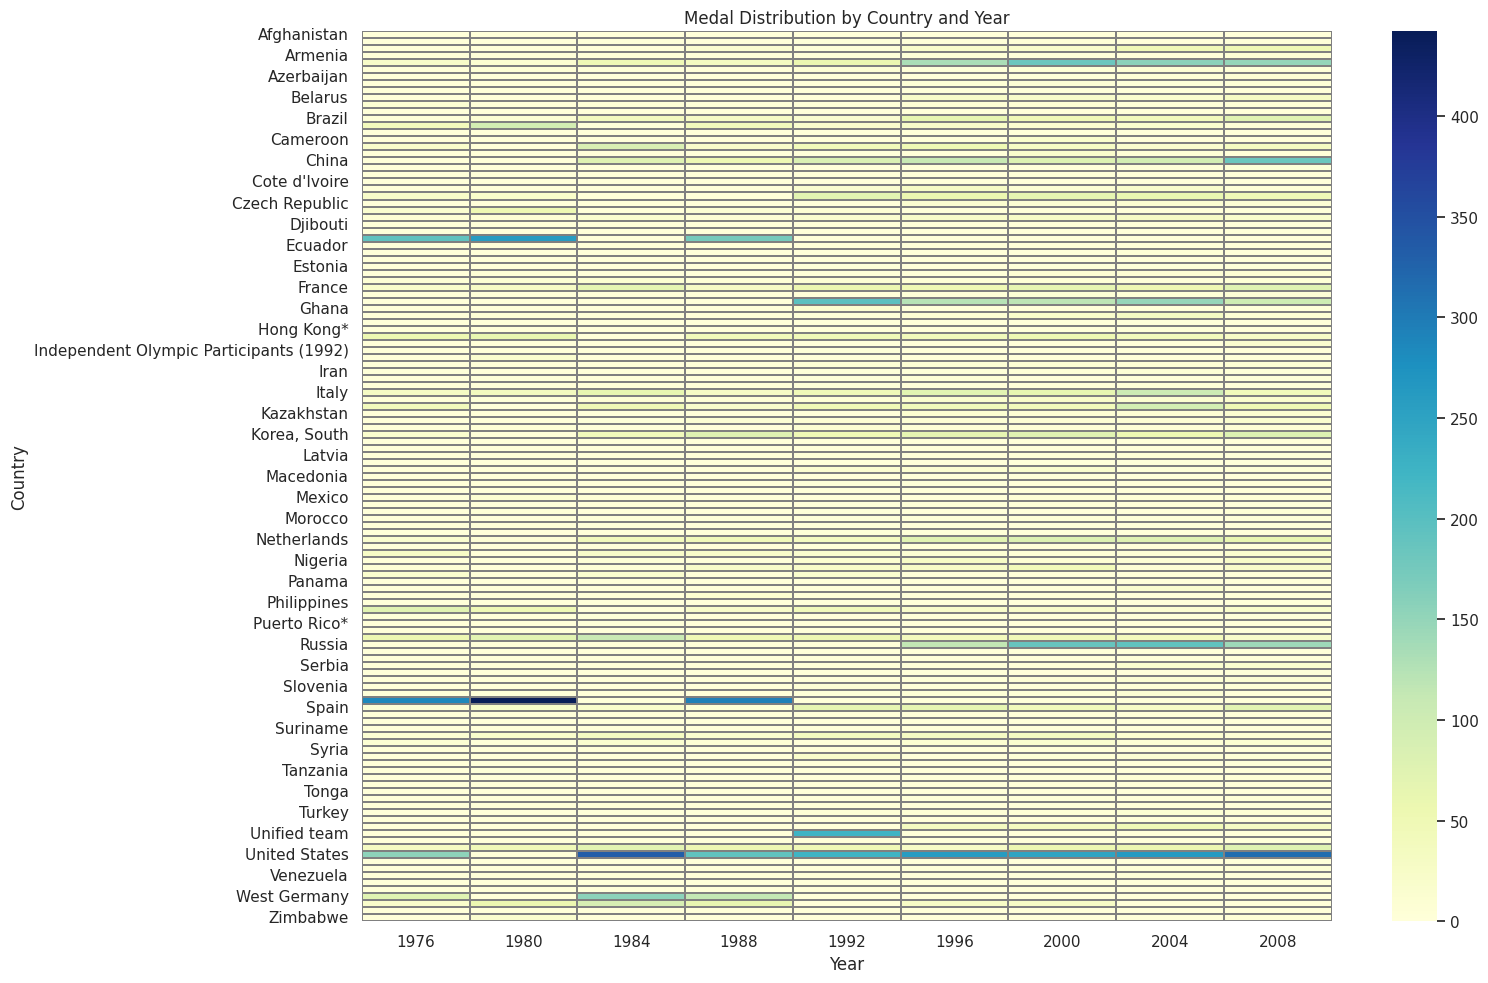

In [14]:
pivot_country_year = df_cleaned.pivot_table(
    index='Country',
    columns='Year',
    values='Medal',
    aggfunc='count'
).fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_country_year, cmap="YlGnBu", linewidths=0.1, linecolor='gray')
plt.title("Medal Distribution by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


/tmp/ipython-input-16-1139967473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports.values, y=top_sports.index, palette="coolwarm")


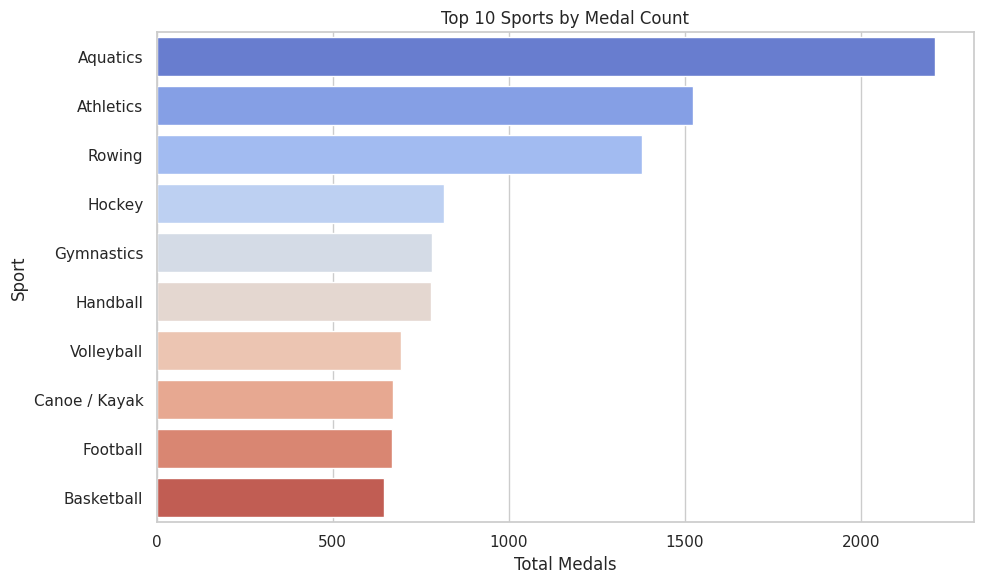

In [16]:
top_sports = df_cleaned['Sport'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sports.values, y=top_sports.index, palette="coolwarm")
plt.title("Top 10 Sports by Medal Count")
plt.xlabel("Total Medals")
plt.ylabel("Sport")
plt.tight_layout()
plt.show()


<Figure size 1200x700 with 0 Axes>

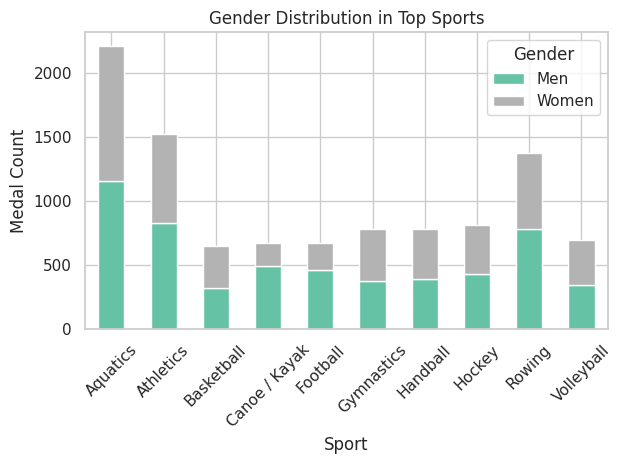

In [18]:
gender_sport = df_cleaned[df_cleaned['Sport'].isin(top_sports.index)]
gender_sport_counts = gender_sport.groupby(['Sport', 'Gender'])['Medal'].count().unstack().fillna(0)

plt.figure(figsize=(12, 7))
gender_sport_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Gender Distribution in Top Sports")
plt.xlabel("Sport")
plt.ylabel("Medal Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
# Duplicate a subset and assign Medal = 0
no_medals = data_ml.sample(200, random_state=42).copy()
no_medals['Medal'] = 0

# Combine with original medal winners
data_combined = pd.concat([data_ml, no_medals], ignore_index=True)

# Shuffle
data_combined = data_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Redefine features and target
X = data_combined[['Country', 'Sport', 'Gender']]
y = data_combined['Medal']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9868958109559614
Confusion Matrix:
 [[   0   61]
 [   0 4594]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.99      1.00      0.99      4594

    accuracy                           0.99      4655
   macro avg       0.49      0.50      0.50      4655
weighted avg       0.97      0.99      0.98      4655



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
